<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/car_price_prediction_through_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [8]:
df = pd.read_csv('car_purchasing.csv', encoding='latin1')

In [9]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [10]:
 df=df.drop(columns=['customer e-mail','customer name','gender'])

In [11]:
df.head()

,country,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [12]:
df.shape

(500, 6)

In [13]:
df.isnull().sum()

country                0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [14]:
df['country'].unique()

array(['Bulgaria', 'Belize', 'Algeria', 'Cook Islands', 'Brazil',
       'Liberia', 'Syria', 'Czech Republic', 'Armenia', 'Somalia',
       'Sint Maarten', 'Greenland', 'Nicaragua', 'Palestine, State of',
       'United Arab Emirates', 'Gabon', 'Tokelau', 'Portugal', 'Chad',
       'Iraq', 'Sudan', 'Angola', 'Nigeria', 'Madagascar', 'Macedonia',
       'Oman', 'Colombia', 'Namibia', 'Denmark', 'Dominican Republic',
       'Costa Rica', 'Botswana', 'Saint Pierre and Miquelon', 'France',
       'Senegal', 'Cambodia', 'Suriname', 'Turkey', 'Ethiopia',
       'French Guiana', 'Bhutan', 'Georgia', 'Mozambique', 'Nauru',
       'Timor-Leste', 'Djibouti', 'Argentina', 'Taiwan', 'Åland Islands',
       'Turks and Caicos Islands', 'Samoa', 'Vanuatu', 'Mongolia',
       'Sri Lanka', 'Guinea-Bissau', 'Egypt', 'Slovenia', 'Benin',
       'Cape Verde', 'Paraguay', 'Laos', 'Iceland', 'Viet Nam',
       'Marshall Islands', 'Germany', 'Kyrgyzstan', 'Mauritius', 'Gambia',
       'Reunion', 'Jordan', 'S

In [15]:
len(df['country'].unique())

211

In [16]:
df.corr()['car purchase amount']

<ipython-input-16-a16a8ff680c0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['car purchase amount']


age                    0.632865
annual Salary          0.617862
credit card debt       0.028882
net worth              0.488580
car purchase amount    1.000000
Name: car purchase amount, dtype: float64

In [17]:
c_dumpy=pd.get_dummies(df['country'],drop_first=True)

In [18]:
df_dummies=pd.concat([df,c_dumpy],axis=1)

In [19]:
df_dummies=df_dummies.drop(columns='country')

In [20]:
df_dummies.head()

,age,annual Salary,credit card debt,net worth,car purchase amount,Algeria,American Samoa,Andorra,Angola,Anguilla,...,Venezuela,Viet Nam,"Virgin Islands, British","Virgin Islands, United States",Wallis and Futuna,Western Sahara,Yemen,Zimbabwe,marlal,Åland Islands
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X=df_dummies.drop(columns='car purchase amount')
y=df_dummies['car purchase amount']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((400, 214), (100, 214), (400,), (100,))

In [25]:
sc=StandardScaler()

In [26]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [30]:
# !pip install keras-tuner

In [31]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers,losses
from tensorflow.keras.models import Sequential
import kerastuner as kt

<ipython-input-31-73f1a621a83f>:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [32]:
model=Sequential()

In [33]:
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='linear'))

In [34]:
model.compile(loss=losses.mean_absolute_error,
             optimizer='adam',
             metrics=['mae'])

In [35]:
history=model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),batch_size=25,epochs=550,verbose=0)

In [36]:
import matplotlib.pyplot as plt

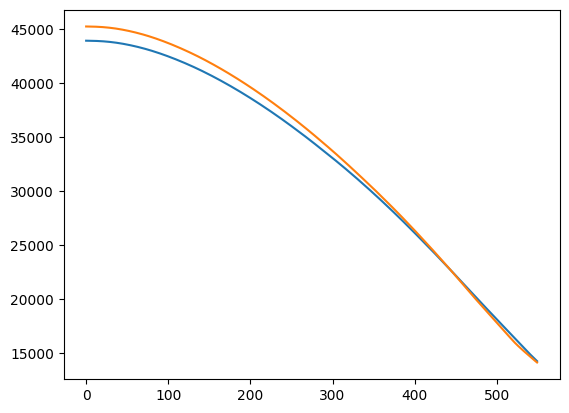

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [38]:
def build_model(hp):
  model = Sequential()
  units=hp.Int('units', min_value=8,max_value=128)
  activations=hp.Choice('activations',values=['linear','relu','tanh','selu'])
  model.add(layers.Dense(units=units,activation=activations,input_dim=214))

  model.add(layers.Dense(1, activation='linear'))
  optimizers=hp.Choice('optimizers',values=['adagrad','adam','sgd','rmsprop'])
  model.compile(loss=losses.mean_absolute_error,
             optimizer=optimizers)

  return model

In [39]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    project_name='rkg')

In [40]:
tuner.search(X_train_scaled, y_train, epochs=5, validation_data=(X_test_scaled, y_test))

Trial 5 Complete [00h 00m 01s]
val_loss: 45264.6640625

Best val_loss So Far: 45247.8515625
Total elapsed time: 00h 00m 05s


In [41]:
tuner.get_best_hyperparameters()[0].values

{'units': 86, 'activations': 'relu', 'optimizers': 'sgd'}

In [42]:
best_model = tuner.get_best_models(num_models=1)[0]

In [43]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 86)                18490     
                                                                 
 dense_1 (Dense)             (None, 1)                 87        
                                                                 
Total params: 18,577
Trainable params: 18,577
Non-trainable params: 0
_________________________________________________________________


In [44]:
history=best_model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=250,initial_epoch=6,verbose=0)

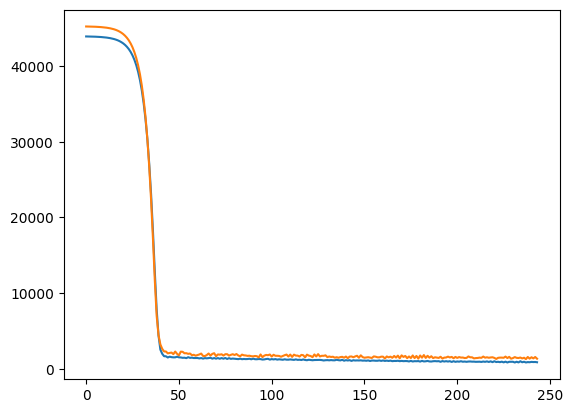

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [46]:
def build_model(hp):
  model = Sequential()

  model.add(layers.Dense(units=106,activation='tanh',input_dim=214))

  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
    model.add(layers.Dense(106,activation='tanh'))

  model.add(layers.Dense(1, activation='linear'))

  model.compile(loss=losses.mean_absolute_error,
             optimizer='sgd')

  return model

In [47]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    project_name='num_layers')

In [48]:
tuner.search(X_train_scaled, y_train, epochs=5, validation_data=(X_test_scaled, y_test))

Trial 5 Complete [00h 00m 01s]
val_loss: 45234.12109375

Best val_loss So Far: 45218.14453125
Total elapsed time: 00h 00m 07s


In [49]:
tuner.get_best_hyptuner.get_best_hyperparameters()[0].valueserparameters()[0].values

{'num_layers': 10}

In [50]:
best_model_1=tuner.get_best_models(num_models=1)[0]

In [51]:
best_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 106)               22790     
                                                                 
 dense_1 (Dense)             (None, 106)               11342     
                                                                 
 dense_2 (Dense)             (None, 106)               11342     
                                                                 
 dense_3 (Dense)             (None, 106)               11342     
                                                                 
 dense_4 (Dense)             (None, 106)               11342     
                                                                 
 dense_5 (Dense)             (None, 106)               11342     
                                                                 
 dense_6 (Dense)             (None, 106)               1

In [52]:
history=best_model_1.fit(X_train_scaled,y_train,epochs=50,initial_epoch=6,validation_data=(X_test_scaled,y_test))

Epoch 7/50
13/13 [==============================] - 1s 15ms/step - loss: 43893.5898 - val_loss: 45204.6992
Epoch 8/50
13/13 [==============================] - 0s 5ms/step - loss: 43880.0000 - val_loss: 45190.9844
Epoch 9/50
13/13 [==============================] - 0s 5ms/step - loss: 43866.2383 - val_loss: 45177.1953
Epoch 10/50
13/13 [==============================] - 0s 4ms/step - loss: 43852.4219 - val_loss: 45163.3359
Epoch 11/50
13/13 [==============================] - 0s 3ms/step - loss: 43838.5391 - val_loss: 45149.4336
Epoch 12/50
13/13 [==============================] - 0s 4ms/step - loss: 43824.6250 - val_loss: 45135.5195
Epoch 13/50
13/13 [==============================] - 0s 5ms/step - loss: 43810.7148 - val_loss: 45121.6094
Epoch 14/50
13/13 [==============================] - 0s 5ms/step - loss: 43796.8047 - val_loss: 45107.6992
Epoch 15/50
13/13 [==============================] - 0s 4ms/step - loss: 43782.8906 - val_loss: 45093.7812
Epoch 16/50
13/13 [====================

In [82]:
def build_model(hp):
  model = Sequential()
  c=0

  model.add(layers.Dense(units=106,activation='tanh',input_dim=214))

  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
    if c==0:
      model.add(layers.Dense(
          units=hp.Int('units'+str(i),min_value=8,max_value=128),
          activation=hp.Choice('activations'+str(i),values=['relu','tanh','linear','sigmoid','selu','elu']),
          input_dim=214
          )
      )
      model.add(layers.Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    else:
      model.add(layers.Dense(
          units=hp.Int('units'+str(i),min_value=8,max_value=128),
          activation=hp.Choice('activations'+str(i),values=['relu','tanh','linear','sigmoid','selu','elu']),
          input_dim=214
          )
      )
      model.add(layers.Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    c+=1

  model.add(layers.Dense(1, activation='linear'))

  model.compile(loss=losses.mean_absolute_error,
             optimizer=hp.Choice('optimizers',values=['rmsprop','adam','sgd','adagrad','adadelta']))

  return model

In [83]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    project_name='final_tuner_1')

In [84]:
tuner.search(X_train_scaled, y_train, epochs=5, validation_data=(X_test_scaled, y_test))

In [85]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 6,
 'units0': 71,
 'activations0': 'elu',
 'dropout0': 0.4,
 'optimizers': 'adam',
 'units1': 27,
 'activations1': 'sigmoid',
 'dropout1': 0.5,
 'units2': 35,
 'activations2': 'elu',
 'dropout2': 0.4,
 'units3': 8,
 'activations3': 'relu',
 'dropout3': 0.1,
 'units4': 8,
 'activations4': 'relu',
 'dropout4': 0.1,
 'units5': 8,
 'activations5': 'relu',
 'dropout5': 0.1}

In [86]:
model_3=tuner.get_best_models(num_models=1)[0]

In [87]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 106)               22790     
                                                                 
 dense_1 (Dense)             (None, 71)                7597      
                                                                 
 dropout (Dropout)           (None, 71)                0         
                                                                 
 dense_2 (Dense)             (None, 27)                1944      
                                                                 
 dropout_1 (Dropout)         (None, 27)                0         
                                                                 
 dense_3 (Dense)             (None, 35)                980       
                                                                 
 dropout_2 (Dropout)         (None, 35)                0

In [88]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.1,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [89]:
history=model_3.fit(X_train_scaled,y_train,epochs=200,initial_epoch=5,validation_data=(X_test_scaled,y_test),callbacks=callback)

Epoch 6/200
13/13 [==============================] - 1s 13ms/step - loss: 43916.2305 - val_loss: 45222.2539
Epoch 7/200
13/13 [==============================] - 0s 4ms/step - loss: 43891.0859 - val_loss: 45191.3867
Epoch 8/200
13/13 [==============================] - 0s 4ms/step - loss: 43853.8711 - val_loss: 45144.2188
Epoch 9/200
13/13 [==============================] - 0s 3ms/step - loss: 43796.1250 - val_loss: 45076.6133
Epoch 10/200
13/13 [==============================] - 0s 4ms/step - loss: 43719.9414 - val_loss: 44980.2148
Epoch 11/200
13/13 [==============================] - 0s 3ms/step - loss: 43595.5586 - val_loss: 44847.4492
Epoch 12/200
13/13 [==============================] - 0s 3ms/step - loss: 43467.1797 - val_loss: 44668.3789
Epoch 13/200
13/13 [==============================] - 0s 3ms/step - loss: 43239.9102 - val_loss: 44424.5938
Epoch 14/200
13/13 [==============================] - 0s 4ms/step - loss: 42962.4258 - val_loss: 44098.6016
Epoch 15/200
13/13 [===========

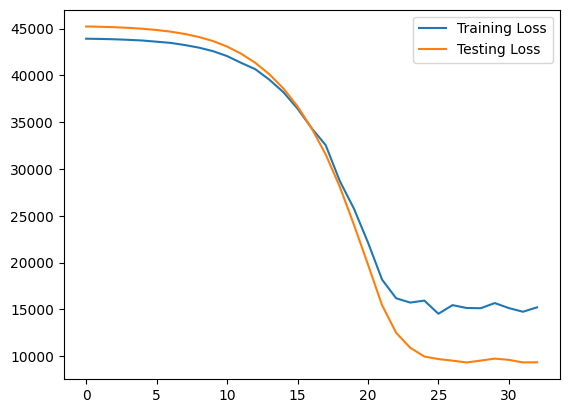

In [90]:
plt.plot(history.history['loss'],label="Training Loss")
plt.plot(history.history['val_loss'],label="Testing Loss")
plt.legend()
plt.show()